In [1]:
import numpy as np
import torch

In [2]:
thetas_posterior_a = np.load('thetas_posterior_1a.npy')

In [26]:
thetas_posterior_b = np.load('thetas_posterior_1c.npy')

(array([  3317.,  89217., 197723., 134685.,  82236.,  85753., 147498.,
        194025.,  64088.,   1458.]),
 array([-2.4020255 , -1.9141203 , -1.4262153 , -0.93831015, -0.45040506,
         0.03750002,  0.5254051 ,  1.0133102 ,  1.5012153 ,  1.9891204 ,
         2.4770255 ], dtype=float32),
 <a list of 10 Patch objects>)

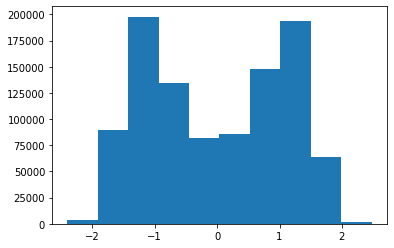

In [27]:
import matplotlib.pyplot as plt
plt.hist(thetas_posterior_a)

(array([   335.,   8565.,  59618., 163425., 251737., 259084., 175588.,
         69818.,  11432.,    398.]),
 array([-1.82109   , -1.461077  , -1.101064  , -0.74105096, -0.38103795,
        -0.02102494,  0.33898807,  0.6990011 ,  1.0590141 ,  1.4190271 ,
         1.7790401 ], dtype=float32),
 <a list of 10 Patch objects>)

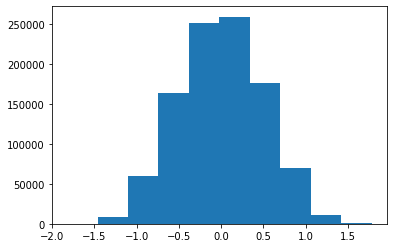

In [28]:
import matplotlib.pyplot as plt
plt.hist(thetas_posterior_b)

In [29]:
observations = np.load("obs1a.npy")
observations_tensor = torch.Tensor(observations)

In [30]:
from torch.distributions.normal import Normal

def log_likelihood(mean, observations, sigma=1):
    return Normal(mean, sigma).log_prob(observations).sum(dim=1)

In [31]:
thetas_all = np.vstack([thetas_posterior_a, thetas_posterior_b])

In [32]:
thetas_all_tensor = torch.Tensor(thetas_all)

In [35]:
thetas_all_tensor = torch.Tensor(thetas_all)

In [36]:
lls_a = log_likelihood(-thetas_all_tensor*thetas_all_tensor,
                       observations_tensor.squeeze().unsqueeze(0).expand(thetas_all_tensor.shape[0],-1),
                       sigma=1)
lls_a = lls_a.cpu().numpy()

In [38]:
lls_b = log_likelihood(thetas_all_tensor*thetas_all_tensor,
                       observations_tensor.squeeze().unsqueeze(0).expand(thetas_all_tensor.shape[0],-1),
                       sigma=1)
lls_b = lls_b.cpu().numpy()

In [40]:
N = thetas_posterior_a.shape[0]
def nll(logB):
    part1 = np.log(1.+np.exp(lls_b[:N] - lls_a[:N] + logB)).mean()
    part2 = np.log(1.+np.exp(lls_a[N:] - lls_b[N:] - logB)).mean()
    return part1 + part2

In [46]:
from scipy import optimize
np.seterr('raise')
result = optimize.minimize_scalar(nll)

In [47]:
result.success

True

In [48]:
result.x

1.5967321357341122